In [1]:
""" Predict restaurant visitors during a month of 2017, 
    including the'Golden Week' Holiday, 
    based on restaurant visitor data 2016-2107

    Data available:
    air_reserve.csv - online reserve data; time reservation made, time of reservation, store id
    hpg_reserve.csv - same but from the hpg data source
    
    air_visit_data.csv - actual visitors to the air stores (not just reservations)
    
    air_store_info.csv - restaurant genres, areas, longitude & latitude - SELECT RESTAURANTS ONLY
    hpg_store_info.csv - same from hpg
    store_id_relation.csv - relation between store IDs covered by both air and hpg
    
    date_info.csv - days of week, Holiday/non-holiday for all days in the data
    
    sample_submission.csv - restaurants and dates that need to be predicted."""

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import os
from datetime import datetime

In [18]:
# read all files into pandas dataframes, stored in a dictionary.
# dictionary keys are the file names, values are dataframes

dataset={}

for i in os.listdir():
    if "csv" in i:
        dataset["{0}".format(i)] = pd.read_csv(i)
        
# grab list of file names for easy access
        
filenames = list(dataset.keys())
filenames

['air_reserve.csv',
 'air_store_info.csv',
 'air_visit_data.csv',
 'date_info.csv',
 'hpg_reserve_1.csv',
 'hpg_reserve_2.csv',
 'hpg_store_info.csv',
 'sample_submission.csv',
 'store_id_relation.csv']

In [19]:
"""set datetime data types for later merging based on day"""

#make initial data set
total_dat = pd.merge(dataset['air_visit_data.csv'], 
                     dataset["store_id_relation.csv"], how='outer')

#change dates to datetime objects
total_dat.rename(index = str, columns  = {'visit_date': 'date'}, inplace = True)
total_dat['date'] = pd.to_datetime(total_dat['date'])


dataset["air_reserve.csv"]['reserve_datetime'] = pd.to_datetime(
    dataset["air_reserve.csv"]['reserve_datetime'])
dataset["air_reserve.csv"]['visit_datetime'] = pd.to_datetime(
    dataset["air_reserve.csv"]['visit_datetime'])

dataset["hpg_reserve_1.csv"]['reserve_datetime'] = pd.to_datetime(
    dataset["hpg_reserve_1.csv"]['reserve_datetime'])
dataset["hpg_reserve_1.csv"]['visit_datetime'] = pd.to_datetime(
    dataset["hpg_reserve_1.csv"]['visit_datetime'])                      

dataset["hpg_reserve_2.csv"]['reserve_datetime'] = pd.to_datetime(
    dataset["hpg_reserve_2.csv"]['reserve_datetime'])
dataset["hpg_reserve_2.csv"]['visit_datetime'] = pd.to_datetime(
    dataset["hpg_reserve_2.csv"]['visit_datetime'])
dataset["date_info.csv"]['calendar_date'] = pd.to_datetime(
    dataset["date_info.csv"]['calendar_date'])

#rename data files to separate air & hpg reservations
dataset["air_reserve.csv"].rename(index = str, columns = 
                                    {"reserve_datetime":"air_reserve_datetime",
                                     "visit_datetime":"air_visit_datetime",
                                     "reserve_visitors":"air_reserve_visitors"}, 
                                    inplace = True)
dataset["hpg_reserve_1.csv"].rename(index = str, columns = 
                                    {"reserve_datetime":"hpg_reserve_datetime",
                                     "visit_datetime":"hpg_visit_datetime",
                                     "reserve_visitors":"hpg_reserve_visitors"}, 
                                    inplace = True)
dataset["hpg_reserve_2.csv"].rename(index = str, columns = 
                                    {"reserve_datetime":"hpg_reserve_datetime",
                                     "visit_datetime":"hpg_visit_datetime",
                                     "reserve_visitors":"hpg_reserve_visitors"}, 
                                    inplace = True)

In [20]:

#setup dummy columns called date to merge on:
dataset['hpg_reserve_1.csv']['date']=dataset['hpg_reserve_1.csv']['hpg_visit_datetime'].dt.date
dataset['hpg_reserve_2.csv']['date']=dataset['hpg_reserve_2.csv']['hpg_visit_datetime'].dt.date
dataset['air_reserve.csv']['date']=dataset['air_reserve.csv']['air_visit_datetime'].dt.date

dataset['hpg_reserve_1.csv']['date'] = pd.to_datetime(dataset['hpg_reserve_1.csv']['date'])
dataset['hpg_reserve_2.csv']['date'] = pd.to_datetime(dataset['hpg_reserve_2.csv']['date'])
dataset['air_reserve.csv']['date'] = pd.to_datetime(dataset['air_reserve.csv']['date'])


total_dat = total_dat.merge(dataset['air_reserve.csv'], how = 'outer')
total_dat = total_dat.merge(dataset['hpg_reserve_1.csv'].append(
    dataset['hpg_reserve_2.csv']),how = 'outer')

#total_dat = total_dat.set_index(['date', 'visitors'])
total_dat

,air_store_id,date,visitors,hpg_store_id,air_visit_datetime,air_reserve_datetime,air_reserve_visitors,hpg_visit_datetime,hpg_reserve_datetime,hpg_reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
1,air_25e9888d30b386df,2016-01-13,21.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
2,air_fd6aac1043520e83,2016-01-13,40.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
3,air_64d4491ad8cdb1c6,2016-01-13,5.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
4,air_ee3a01f0c71a769f,2016-01-13,18.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
5,air_9438d67241c81314,2016-01-13,24.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
6,air_d0e8a085d8dc83aa,2016-01-13,9.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
7,air_5c65468938c07fa5,2016-01-13,16.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
8,air_9fc607777ad76b26,2016-01-13,5.0,NaN,NaT,NaT,NaN,NaT,NaT,NaN
9,air_326ca454ef3558bc,2016-01-13,9.0,NaN,2016-01-13 20:00:00,2016-01-02 15:00:00,3.0,NaT,NaT,NaN


In [21]:
total_dat = total_dat.merge(dataset['air_store_info.csv'],how = 'outer')
total_dat = total_dat.merge(dataset['hpg_store_info.csv'],how = 'outer')

In [22]:
dataset["date_info.csv"]['calendar_date'] = pd.to_datetime(
    dataset["date_info.csv"]['calendar_date'])
dataset["date_info.csv"].rename(index = str, columns = 
                                    {"calendar_date":"date"}, inplace=True)
total_dat = total_dat.merge(dataset['date_info.csv'],how = 'inner')

In [23]:
#set date and visitors to indices to make data sparse
total_dat = total_dat.set_index(['air_store_id','air_genre_name','air_area_name','latitude',
                                 'longitude','date','day_of_week',"holiday_flg",'hpg_store_id']
                                 #'visitors'])
#['air_store_id','date','day_of_week',"holiday_flg","visitors"]
total_dat

air_visit_datetime  \
air_store_id         air_genre_name air_area_name                           latitude  longitude  date       day_of_week holiday_flg hpg_store_id         visitors                       
air_ba937bf13d40fb24 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  25.0                     NaT   
air_fd6aac1043520e83 Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  40.0                     NaT   
air_64d4491ad8cdb1c6 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  5.0                      NaT   
air_4ce7b17062a1bf73 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  3.0                      NaT   
air_e0118664da63a2d0 Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  18.0                     NaT   
air_671b4bea84dafb67 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  31.0                     NaT   
air_86cfbf2624576fad Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  8.0                      NaT   
air_877f79706adbfb06 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  17.0     2016-01-13 21:00:00   
                                                                                                                                                         17.0     2016-01-13 21:00:00   
                                                                                                                                                         17.0     2016-01-13 21:00:00   
                                                                                                                                                         17.0     2016-01-13 21:00:00   
air_681f96e6a6595f82 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  42.0                     NaT   
air_6b9fa44a9cf504a1 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  2.0      2016-01-13 21:00:00   
air_df5cf5cd03eb68d0 Bar/Cocktail   Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  3.0                      NaT   
air_60aa54ecbc602348 Bar/Cocktail   Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  7.0                      NaT   
air_ef920fa6f4b085f6 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  28.0                     NaT   
air_6b7678aae65d2d59 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  16.0                     NaT   
air_4d71826793c09b22 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  21.0                     NaT   
air_55390f784018349a Cafe/Sweets    Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                  35.0                     NaT   
air_25e9888d30b386df Izakaya        Tōkyō-to Shinagawa-ku Higashigotanda    35.626568 139.725858 2016-01-13 Wednesday   0           NaN                  21.0                     NaT   
air_4cab91146e3d1897 Izakaya        Tōkyō-to Shinagawa-ku Higashigotanda    35.626568 139.725

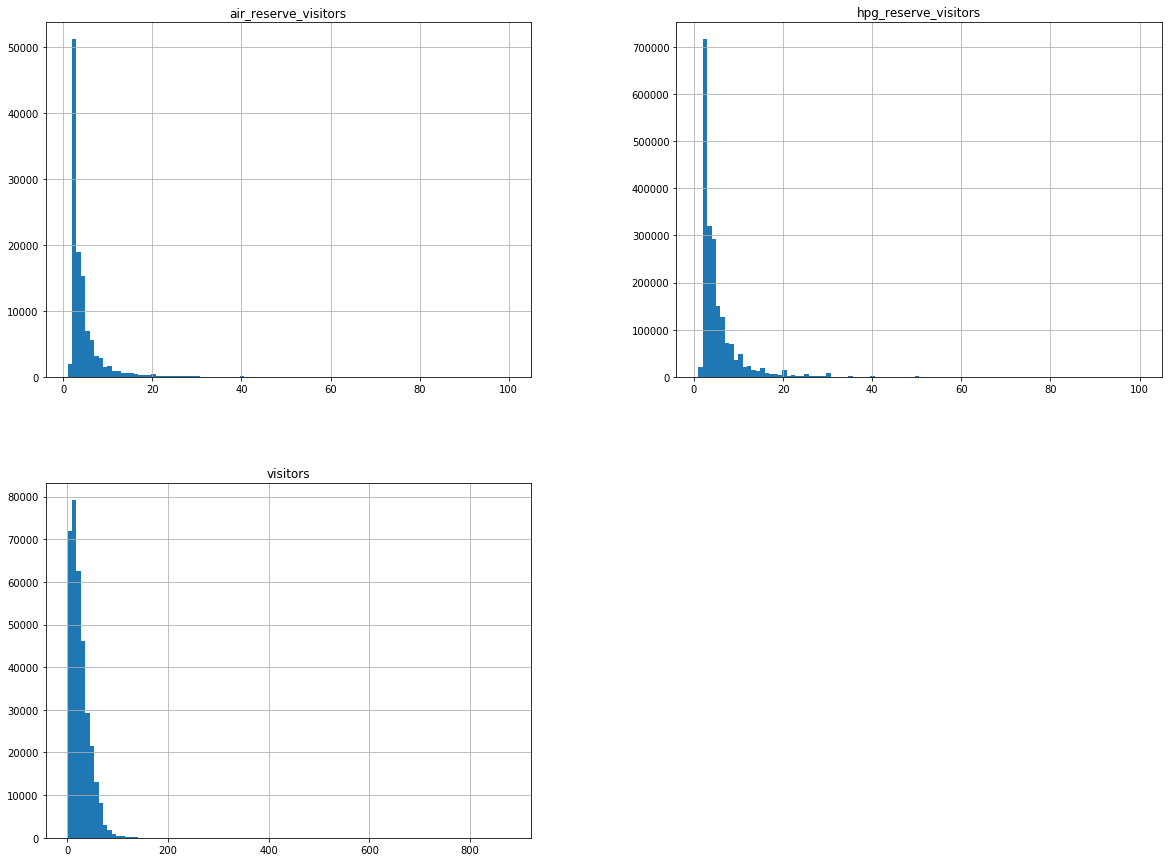

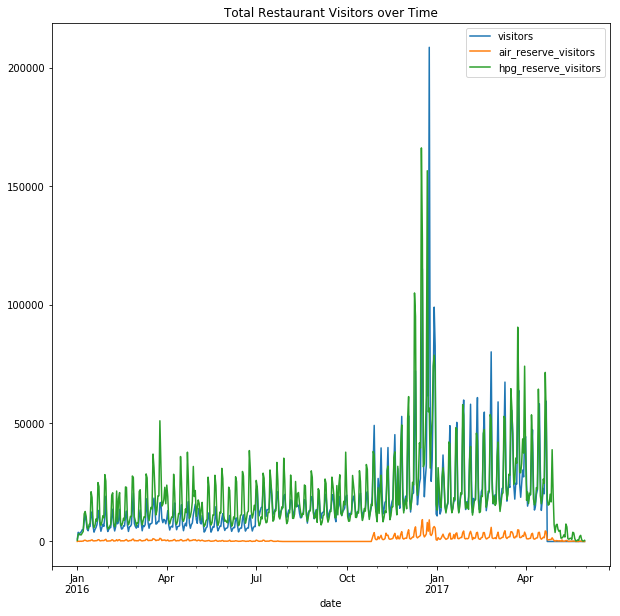

In [92]:
#make basic histograms showing distributions of visitors & reserve visitors
total_dat.hist(bins=100,figsize=(20,15))
plt.show()

#visitors over time
total_dat.groupby('date').agg(np.sum).plot(
    figsize=(10,10), title="Total Restaurant Visitors over Time")

KeyError: 'date'

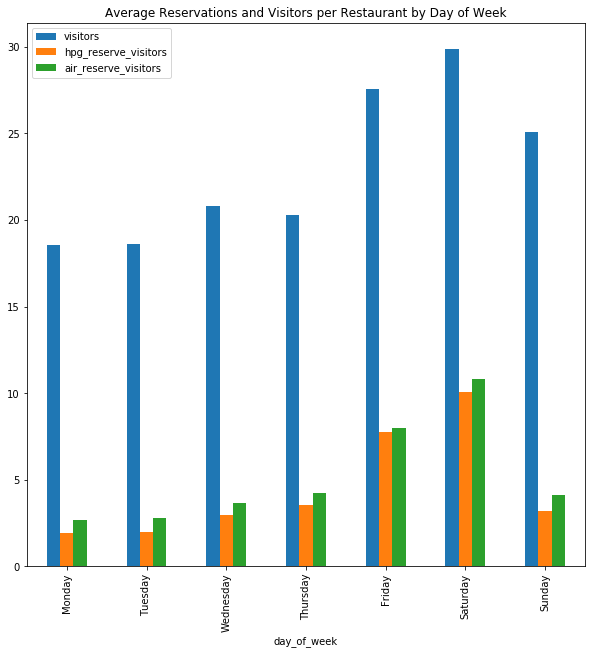

In [101]:
#plot average visitors/day
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

total_dat.groupby(['air_store_id','date','day_of_week','hpg_store_id']).agg(
    {'visitors': np.mean, 'hpg_reserve_visitors': np.sum, 
     'air_reserve_visitors': np.sum}).groupby('day_of_week').agg(
    np.mean).reindex(week).plot(
    kind='bar',title='Average Reservations and Visitors per Restaurant by Day of Week',
    figsize=(10,10))

total_dat.groupby(['air_store_id','date','day_of_week','hpg_store_id']).agg(
    {'visitors': np.mean, 'hpg_reserve_visitors': np.sum, 
     'air_reserve_visitors': np.sum}).groupby(total_dat['date'].month).agg(
    np.mean).reindex(week).plot(
    kind='bar',title='Average Reservations and Visitors per Restaurant by Day of Week',
    figsize=(10,10))



#np.mean for visitors gives the total number of visitors (visitors is redundantly copied)
#np.sum for reservations to gives the total number of reservations
#total_dat.groupby(['air_store_id','date','day_of_week','hpg_store_id']).agg(
#    {'visitors': np.mean, 'hpg_reserve_visitors': np.sum, 
#     'air_reserve_visitors': np.sum}).groupby('day_of_week').agg(np.sum).reindex(week).plot(
#    kind='bar',title='Total Reservations and Visitors per Restaurant by Day of Week',
#    figsize=(10,10))

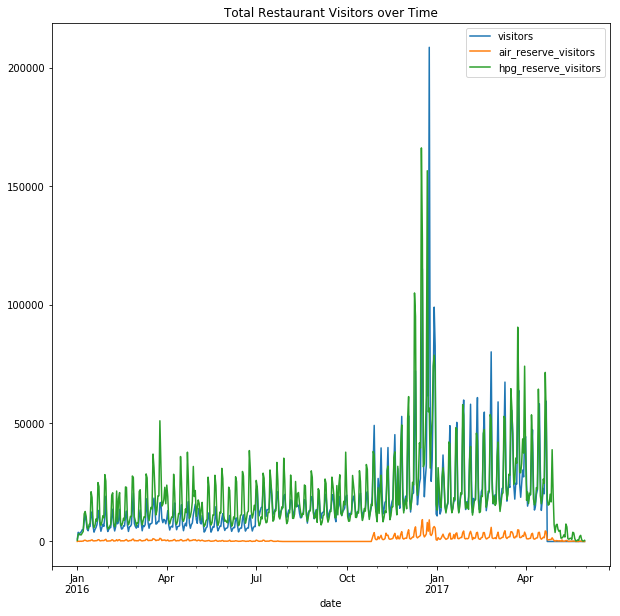

In [90]:
#visitors over time
total_dat.groupby('date').agg(np.sum).plot(
    figsize=(10,10), title="Total Restaurant Visitors over Time")

In [69]:
total_dat

visitors  \
air_store_id         air_genre_name air_area_name                           latitude  longitude  date       day_of_week holiday_flg hpg_store_id                     
air_ba937bf13d40fb24 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       25.0   
air_fd6aac1043520e83 Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       40.0   
air_64d4491ad8cdb1c6 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        5.0   
air_4ce7b17062a1bf73 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        3.0   
air_e0118664da63a2d0 Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       18.0   
air_671b4bea84dafb67 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       31.0   
air_86cfbf2624576fad Izakaya        Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        8.0   
air_877f79706adbfb06 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       17.0   
                                                                                                                                    NaN                       17.0   
                                                                                                                                    NaN                       17.0   
                                                                                                                                    NaN                       17.0   
air_681f96e6a6595f82 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       42.0   
air_6b9fa44a9cf504a1 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        2.0   
air_df5cf5cd03eb68d0 Bar/Cocktail   Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        3.0   
air_60aa54ecbc602348 Bar/Cocktail   Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                        7.0   
air_ef920fa6f4b085f6 Italian/French Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       28.0   
air_6b7678aae65d2d59 Dining bar     Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       16.0   
air_4d71826793c09b22 Japanese food  Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       21.0   
air_55390f784018349a Cafe/Sweets    Tōkyō-to Minato-ku Shibakōen            35.658068 139.751599 2016-01-13 Wednesday   0           NaN                       35.0   
air_25e9888d30b386df Izakaya        Tōkyō-to Shinagawa-ku Higashigotanda    35.626568 139.725858 2016-01-13 Wednesday   0           NaN                       21.0   
air_4cab91146e3d1897 Izakaya        Tōkyō-to Shinagawa-ku Higashigotanda    35.626568 139.725858 2016-01-13 Wednesday   0           NaN                       10.0   
air_ee3a01f0c71a769f Cafe/Sweets    Shizuoka-ken Hamamatsu-shi Motoshirochō 34.710895 137.725940 2016-01-13 Wednesday   0           NaN                       18.0   
air_a678e5b144ca24ce Other          Shizuoka-ken Hamamatsu-shi Motoshirochō 34.710895 137.725940 2016-01-13 Wednesday   0           NaN                       12.0   
air_

In [ ]:
# function to convert datetime values into friendlier format using datetime package

def date_converter(df, dates_key, datemask="%Y-%m-%d %H:%M:%S"):

    date = []

    for i in range(len(df)):
        d = datetime.strptime(df[dates_key][i], datemask)
        date.append(d)

    df[dates_key + "_conv"] = date
    
    return df

In [ ]:
#plot average visitors/day
data = dataset["air_visit_data.csv"]
avg_air_visitor_dat = data.groupby(data.visit_date.dt.date).mean()
avg_air_visitor_dat.head()
avg_air_visitor_dat.plot()
#what do only Fri/Sat, only holiday, only weekday plots look like? more regular??

#plt.scatter(x=avg_air_visitor_dat["visit_date"], y = avg_air_visitor_dat["visitors"])

In [ ]:
"""#put all the data into one DataFrame

total_dat = pd.merge(dataset['air_visit_data.csv'], 
                     dataset["store_id_relation.csv"], how='outer')
total_dat = total_dat.merge(dataset["air_store_info.csv"].rename
                           (index = str, columns = 
                            {'latitude' : 'air_latitude',
                             'longitude' : 'air_longitude'}),
                            how='outer')
total_dat = total_dat.merge(dataset["hpg_store_info.csv"].rename
                           (index = str, columns = 
                            {'latitude' : 'hpg_latitude',
                             'longitude' : 'hpg_longitude'}),
                            how='outer')
total_dat = total_dat.merge(dataset["air_reserve.csv"].rename
                            (index = str, columns =
                            {'reserve_datetime': 'air_reserve_datetime', 
                             'reserve_visitors': 'air_reserve_visitors'}),
                             how='outer')
total_dat = total_dat.merge(dataset["hpg_reserve_1.csv"].append
                           (dataset["hpg_reserve_2.csv"]).rename
                           (index = str, columns =
                           {'reserve_datetime': 'hpg_reserve_datetime', 
                            'reserve_visitors': 'hpg_reserve_visitors'}),
                            how='outer')
#total_dat = total_dat.merge(dataset['date_info.csv'], how = 'inner')

                    # dataset['date_info.csv'].rename(
            #columns={"calendar_date": "visit_date"} ), on='visit_date', how='outer')
#total_dat = total_dat.merge(dataset["store_id_relation.csv"], how='outer')



total_dat
#total_dat = pd.merge(total_dat, dataset[".csv"], how='outer')
#total_dat.set_index( ['air_store_id','visit_date'] )
#total_dat.set_index(['air_store_id', 'hpg_store_id', 'air_genre_name', 'air_area_name',
#                     'hpg_genre_name', 'hpg_area_name', 'latitude', 'longitude',
#                    ])  #'air_store_id','visit_date','day_of_week','holiday_flg'
#total_dat = pd.merge(total_dat, dataset['date_info.csv'].rename(
#            columns={"calendar_date": "visit_date"} ), on='visit_date')

#total_dat.head(n=20)"""

In [ ]:
#try loading the japan map data from http://www.gsi.go.jp/kankyochiri/gm_japan_e.html
import geopandas

Japan_file = "gm-jpn-all_u_2_2/coastl_jpn.shx"
Japan = geopandas.read_file(Japan_file)
Japan.plot(figsize=(8,8))

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", 
         title = "restaurant locations")